In [1]:
import silq
silq.initialize("EWJN")

qc.show_subprocess_widget()
%matplotlib nbagg

Initializing imports


<IPython.core.display.Javascript object>

Initializing functions
Initializing instruments
Initializing parameters
Initializing data
Initializing analysis
Initializing plotting
Initialization complete


In [2]:
from qcodes.instrument_drivers.AlazarTech.ATS_acquisition_controllers import Continuous_AcquisitionController

continuous_controller = Continuous_AcquisitionController(name='continuous_controller', 
                                                         alazar_name='ATS',
                                                         server_name='Alazar_server')

ImportError: cannot import name 'Continuous_AcquisitionController'

# Single measurements

In [27]:
# Determine empty, load, read fidelities
ELR_parameter.setup(samples=400, print=True)
%time results = ELR_parameter()

fidelity_empty: 0.890
fidelity_load: 1.000
fidelity_read: 0.626
up_proportion: 0.598
dark_counts: 0.193
contrast: 0.405
Wall time: 46.7 s


In [ ]:
T1_parameter.setup(samples=1000)
T1_parameter(5)
%time up_proportion, = T1_parameter()
print('Up proportion: {:.2f}'.format(up_proportion))

T1_parameter.setup(samples=200)
T1_parameter(3000)
%time up_proportion, = T1_parameter()
print('Up proportion: {:.2f}'.format(up_proportion))


DF(0)
DS(0)
LB(0)
RB(0)
SRC(0)
TG(0)
TGAC(0)


DF(2.57)
DS(2.57)
LB(3.8)
RB(3.8)
SRC(0.25)
TG(15.564)
TGAC(1.842)


# DC sweep

### Turnon

In [403]:
for k in np.linspace(1.5,0,6):
    turnon_param(k)

In [4]:
turnon_vals = list(np.linspace(0, 1.6, 200))

In [ ]:
DC_parameter.setup()
# data = qc.Loop(turnon_param[turnon_vals]
data = qc.Loop(dummy_param[0:1000:1], delay=1
               ).each(DC_parameter
                      ).then(qc.Task(layout.stop)
                             ).run(name='turnon',
                                   progress_interval=True)

<IPython.core.display.Javascript object>


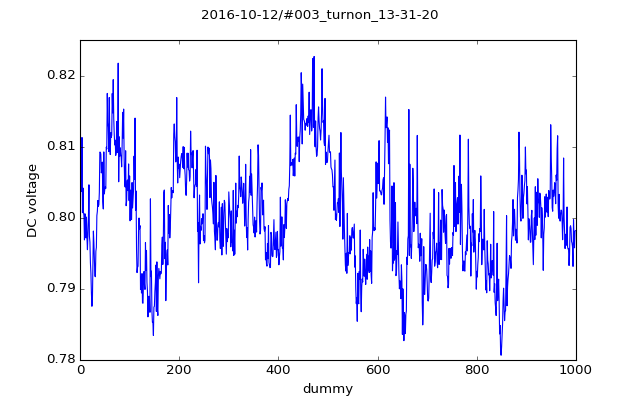

In [18]:
plot = qc.MatPlot()
plot.add(data.DC_voltage)

### Pinchoff

In [6]:
turnon_voltage = 1.9
pinchoff_vals = list(np.linspace(turnon_voltage, 0, 200))
gate = RB

turnon_param(turnon_voltage)
DC_parameter.setup()
data = qc.Loop(gate[pinchoff_vals]
               ).each(DC_parameter
                      ).then(qc.Task(layout.stop)
                             ).run(name='Pinchoff_{}'.format(gate.name),
                                   progress_interval=True)

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-10-12/#013_Pinchoff_RB_15-51-46'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | RB_set     | RB           | (200,)
   Measured | DC_voltage | DC_voltage   | (200,)
started at 2016-10-12 15:51:47


<IPython.core.display.Javascript object>


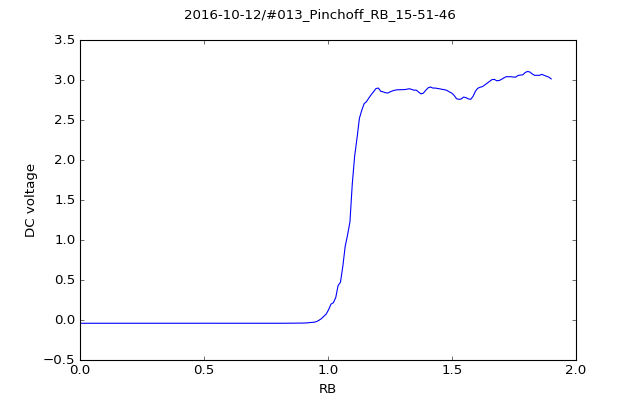

In [7]:
plot = qc.MatPlot()
plot.add(data.DC_voltage)

### 1D DC scan

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-11-03/#003_DC_TGAC_scan_11-50-05'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | TGAC_set   | TGAC         | (50,)
   Measured | DC_voltage | DC_voltage   | (50,)
started at 2016-11-03 11:50:08


<IPython.core.display.Javascript object>


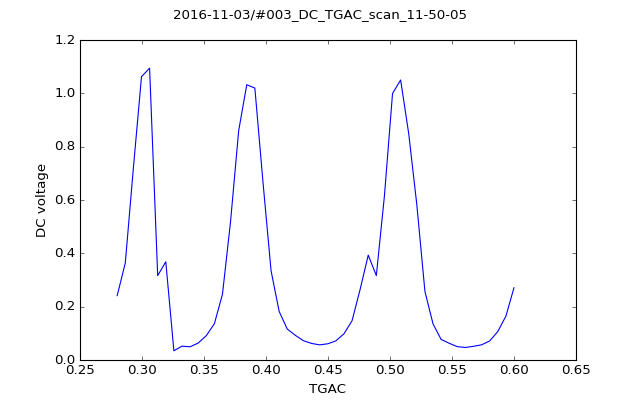

In [2]:
gate1 = TGAC

gate1_vals = list(np.linspace(0.28,0.6, 50))

DC_parameter.setup()
data = qc.Loop(gate1[gate1_vals]
              ).each(DC_parameter
                    ).then(qc.Task(layout.stop)
                          ).run(name='DC_{}_scan'.format(gate1.name),
                                progress_interval=True)

plot = qc.MatPlot()
plot.add(data.DC_voltage)

### 2D DC scans

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-11-03/#008_DC_TGAC_vs_DF_DS_scan_12-07-43'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | TGAC_set   | TGAC         | (40,)
   Setpoint | DF_DS_set  | DF_DS        | (40, 60)
   Measured | DC_voltage | DC_voltage   | (40, 60)
started at 2016-11-03 12:07:46


<IPython.core.display.Javascript object>


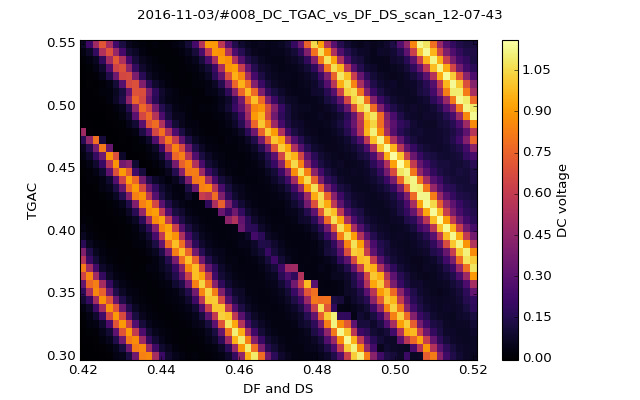

In [7]:
gate1 = TGAC
gate2 = DF_DS

gate1_vals = list(np.linspace(0.3,0.55, 40))
gate2_vals = list(np.linspace(0.42, 0.52, 60))

DC_parameter.setup()
data = qc.Loop(gate1[gate1_vals]
              ).loop(gate2[gate2_vals]
                    ).each(DC_parameter
                          ).then(qc.Task(layout.stop)
                                ).run(name='DC_{}_vs_{}_scan'.format(gate1.name, gate2.name),
                                      progress_interval=True)

plot = qc.MatPlot()
plot.add(data.DC_voltage)

# ELR sequence

In [8]:
ELR_parameter.pulse_sequence['read'].duration = 80
ELR_parameter.setup(samples=100, t_read=20)
result = ELR_parameter()

In [20]:
TGAC_vals = list(np.linspace(0.344,0.346,4))
DF_DS_vals = list(np.linspace(0.4825, 0.484,5))

In [21]:
ELR_parameter.pulse_sequence['read'].duration = 100
ELR_parameter.setup(samples=250, t_read=20)
data = qc.Loop(TGAC[TGAC_vals]
              ).loop(DF_DS[DF_DS_vals]
                    ).each(ELR_parameter
                          ).run(name='ELR_calibration',
                                progress_interval=True)

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-11-03/#012_ELR_calibration_14-23-12'
   <Type>   | <array_id>     | <array.name>   | <array.shape>
   Setpoint | TGAC_set       | TGAC           | (4,)
   Setpoint | DF_DS_set      | DF_DS          | (4, 5)
   Measured | fidelity_empty | fidelity_empty | (4, 5)
   Measured | fidelity_load  | fidelity_load  | (4, 5)
   Measured | fidelity_read  | fidelity_read  | (4, 5)
   Measured | up_proportion  | up_proportion  | (4, 5)
   Measured | dark_counts    | dark_counts    | (4, 5)
   Measured | contrast       | contrast       | (4, 5)
started at 2016-11-03 14:23:15


<IPython.core.display.Javascript object>


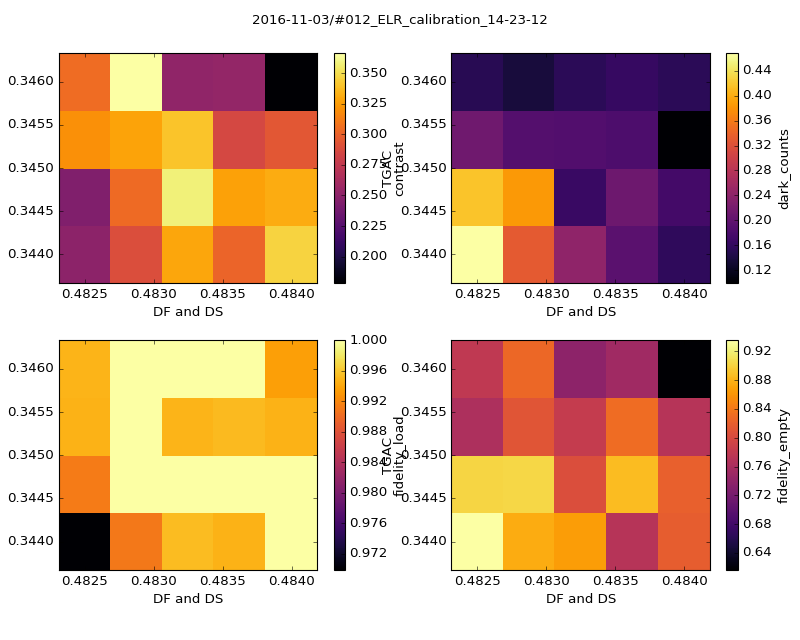

In [22]:
plot = qc.MatPlot(subplots=(2,2), figsize=(10,8), interval=10)
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [25]:
TGAC(0.3445)
DF_DS(0.4832)

# TEST

In [25]:
ATS.config()

In [13]:
layout.stop()

In [32]:
ATS.triggered()

1

In [42]:
ATS.config(sample_rate=200000, )
continuous_controller.average_mode('none')
continuous_controller.samples_per_trace(1024*16)
continuous_controller.traces_per_acquisition(5)
continuous_controller.update_acquisition_settings(mode='CS',
                                                  samples_per_record=32,
                                                  buffer_timeout=5000,
                                                  allocated_buffers=10,
                                                  channel_selection='C')
continuous_controller.setup()

%time result = continuous_controller.acquisition()

trace_idx = 0
for ch in range(len(result)):
    plt.plot(result[ch][trace_idx])

Wall time: 871 ms


In [5]:
interfaces['ATS'].configuration_settings()

{'channel_range': 2,
 'coupling': 'DC',
 'external_trigger_coupling': 'DC',
 'external_trigger_range': 5,
 'trigger_delay': 0,
 'trigger_engine1': 'J',
 'trigger_level1': 148,
 'trigger_operation': 'J',
 'trigger_slope1': 'positive',
 'trigger_source1': 'trig_in'}

In [16]:
interfaces['ATS'].acquisition_settings()

{'buffer_timeout': 20000,
 'buffers_per_acquisition': 10,
 'channel_selection': 'AC',
 'records_per_buffer': 1,
 'samples_per_record': 6000}

In [11]:
interfaces['ATS'].setup()

In [43]:
layout.stop()
# ELR_parameter.pulse_sequence['final'].duration=0.5
ELR_parameter.setup(samples=3, print=True)
# ELR_parameter()

interfaces['ATS'].configuration_settings()

ELR_parameter.pulse_sequence

interfaces['pulseblaster'].pulse_sequence()

In [45]:
interfaces['ATS'].update_settings(buffer_timeout=3000)

In [52]:
layout.stop()
layout.start()

In [59]:
# for trigger_source1 in ['trig_in', 'A', 'B', 'C', 'D']:
#     for trigger_level1 in range(0,255,5):

ATS_controller.update_acquisition_settings(allocated_buffers=3)

trigger_source1 = 'trig_in'
trigger_level1 = 148

ATS.config(trigger_source1=trigger_source1,
           trigger_level1=trigger_level1)
# try:
ATS_controller.acquisition()
print('success at source {}, level {}'.format(trigger_source1,
                                              trigger_level1))
# except:
#     pass

success at source trig_in, level 148


In [ ]:
plot_traces(ELR_parameter.traces['pulses'],
            traces_AWG=ELR_parameter.traces['pulses'])

In [8]:
layout.start()

plotQ = qc.QtPlot()
plotQ.add(data.contrast)
plotQ = qc.QtPlot()
plotQ.add(data.dark_counts)
plotQ = qc.QtPlot()
plotQ.add(data.fidelity_load)
plotQ = qc.QtPlot()
plotQ.add(data.fidelity_empty)

In [11]:
TGAC(0.315)
DF_DS(0.484)

In [43]:
ELR_parameter.setup(samples=400, print=True)
ELR_parameter();

One peak found instead of two, lowering threshold
One peak found instead of two, lowering threshold
One peak found instead of two, lowering threshold
One peak found instead of two, lowering threshold
Could not find two peaks for empty and load state
threshold_voltage: 0.2840657552083333
fidelity_empty: 0.000
fidelity_load: 0.163
fidelity_read: 0.492
up_proportion: 0.833
dark_counts: 1.000
contrast: -0.167


# Read level sweep

In [28]:
variable_read_parameter.setup(samples=100)
data = qc.Loop(variable_read_parameter[-1.5:2.5:0.04]
                     ).each(variable_read_parameter
                           ).run(name='variable_read',
                                progress_interval=True)

NameError: name 'variable_read_parameter' is not defined

In [42]:
plotQ = qc.QtPlot()
plotQ.add(data.Channel_A_signal)

plotQ = qc.QtPlot()
plotQ.add(data.Channel_C_signal)

# T1 measurement

In [11]:
# Prepare measurements: Determine threshold voltage
ELR_parameter.setup(samples=300, return_traces=True)
_, _, _, _, _,traces, traces_AWG = ELR_parameter()
_, _, threshold_voltage = analysis.find_high_low(traces)
assert threshold_voltage is not None, "Couldn't find accurate threshold"
print('Threshold voltage found at {:.2f} V'.format(threshold_voltage))

Threshold voltage found at 0.22 V


In [12]:
# Calculate T1 durations (shuffled)
T1_wait_times = list(np.logspace(1,4.2,num=20,base=10))
np.random.shuffle(T1_wait_times)
print('Shuffled T1 wait times: {}'.format(T1_wait_times))

Shuffled T1 wait times: [15848.931924611141, 1546.9407652462003, 3359.8182862837812, 69.519279617756055, 21.719114020174249, 10.0, 32.008340465997662, 102.45338593872233, 7297.2276446863925, 47.171991382132958, 4951.500669473131, 222.51967709560262, 1049.6696290308787, 327.93628590208834, 483.29302385717523, 10754.220761125622, 2279.789435643565, 712.24855848599145, 14.737406155824797, 150.98971606184202]


In [4]:
# Single point T1 sweep
T1_parameter.setup(threshold_voltage=threshold_voltage, samples=30, data_manager=data_manager_raw)
T1_parameter(30000)
data = qc.Loop(dummy_param[0:30:1]
              ).each(T1_parameter
                    ).run(name='T1_data_high', progress_interval=True)

# plotQ = qc.QtPlot()
# plotQ.add(data.up_proportion)

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-09-21/#001_T1_data_high_08-47-35'
   <Type>   | <array_id>        | <array.name>      | <array.shape>
   Setpoint | dummy_set         | dummy             | (30,)
   Measured | up_proportion     | up_proportion     | (30,)
   Measured | num_traces_loaded | num_traces_loaded | (30,)
started at 2016-09-21 08:47:37


DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-09-20/#039_T1_single_sweep_16-46-59'
   <Type>   | <array_id>        | <array.name>      | <array.shape>
   Setpoint | T1_wait_time_set  | T1_wait_time      | (20,)
   Measured | up_proportion     | up_proportion     | (20,)
   Measured | num_traces_loaded | num_traces_loaded | (20,)
started at 2016-09-20 16:47:00


<IPython.core.display.Javascript object>


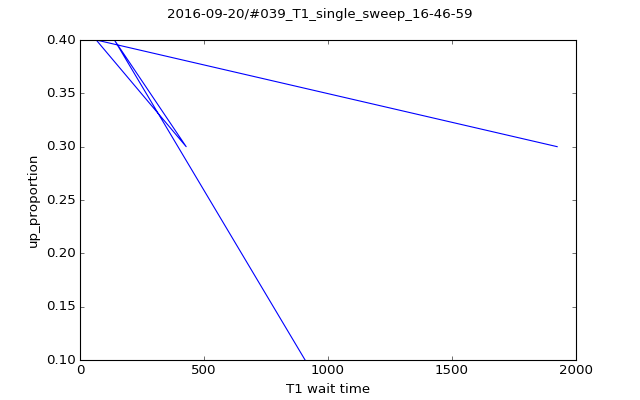

In [73]:
# Single T1 sweep
T1_parameter.setup(threshold_voltage=threshold_voltage, samples=10)

data = qc.Loop(T1_parameter[T1_wait_times]
                     ).each(T1_parameter
                           ).run(name='T1_single_sweep')

plotQ = qc.MatPlot()
plotQ.add(data.up_proportion)

In [15]:
# Continuous T1 sweep
setup_ELRLR = partial(ELRLR_parameter.setup, samples=400, data_manager=data_manager_raw)
setup_T1 = partial(T1_parameter.setup, threshold_voltage=threshold_voltage, samples=150, data_manager=data_manager_raw)
setup_ELRLR()
setup_T1()
data = qc.Loop(dummy_param[0:30:1]
              ).each(qc.Task(setup_ELRLR),
                     ELRLR_parameter,
                     qc.Task(setup_T1),
                     qc.Loop(T1_parameter[T1_wait_times]).each(T1_parameter)
                    ).run(name='T1_data', progress_interval=True)

# plotQ = qc.QtPlot()
# plotQ.add(data.up_proportion)

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-10-21/#009_T1_data_17-09-21'
   <Type>   | <array_id>          | <array.name>      | <array.shape>
   Setpoint | dummy_set           | dummy             | (30,)
   Measured | fidelity_empty      | fidelity_empty    | (30,)
   Measured | fidelity_load       | fidelity_load     | (30,)
   Measured | fidelity_read       | fidelity_read     | (30,)
   Measured | up_proportion_1_3   | up_proportion     | (30,)
   Measured | dark_counts         | dark_counts       | (30,)
   Measured | contrast            | contrast          | (30,)
   Setpoint | T1_wait_time_set    | T1_wait_time      | (30, 20)
   Measured | up_proportion_3_0_0 | up_proportion     | (30, 20)
   Measured | num_traces_loaded   | num_traces_loaded | (30, 20)
started at 2016-10-21 17:09:23


In [19]:
data.sync()
print(data.T1_wait_time_set[0])
data.up_proportion_3_0_0[29]

[  1.58489000e+04   2.22520000e+02   1.07542000e+04   3.20083000e+01
   1.02453000e+02   3.27936000e+02   7.12249000e+02   1.04967000e+03
   4.95150000e+03   7.29723000e+03   1.54694000e+03   1.50990000e+02
   4.71720000e+01   2.17191000e+01   2.27979000e+03   3.35982000e+03
   4.83293000e+02   1.47374000e+01   1.00000000e+01   6.95193000e+01]


array([ 0.14094 ,  0.42    ,  0.193333,  0.510067,  0.463087,  0.436242,
        0.422819,  0.42953 ,  0.194631,  0.213333,  0.342282,  0.433333,
        0.44    ,  0.418919,  0.328859,  0.263514,  0.456376,  0.483221,
        0.436242,  0.44898 ])